## **LIDL ANALYTICS - CANDY CASE STUDY** 

-------------------------------------------------------------------------------------------------------------------------------------------------


#### **INTRODUCTION**

In the following notebook, analysis and machine leanring is performed on the following present scenario and data.

**Scenario:**

The purchasing department of Lidl would like to expand the confectionery assortment (private label). A new candy is to be created for this purpose. However, there is still disagreement within the relevant project team about the characteristics of the new candy.
For example, while some prefer a cookie-based candy, others favor a fruit gum variation. The divisional board therefore decided to commission a market research company to determine the popularity of the sweets available on the market.
The results of the market research are now available and you have been commissioned to conduct an analysis of the data. The aim is to analyze the impact of the characteristics of confectionery on their popularity and, based on this analysis, to make a recommendation for the characteristics of a new confectionery.

**Data:**

https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking

#### **DATA AND IMPORTS**

In [88]:
# data formating
import pandas as pd
import numpy as np

# plotting
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning & metrics
from scipy.stats import linregress
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, roc_curve, mean_squared_error, r2_score

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

**Load data**

In [89]:
df = pd.read_csv("/Users/florian/Documents/GitHub/candy-data.csv")

In [90]:
df

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,Welch's Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,Werther's Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


#### **ANALYSIS**

**WINPERCENTAGE DISTRIBUTION**

To be able to judge the success of the candies, we first look at the distribution of the winpercentage column in our dataframe and create a barplot to match.

- In order to later have the candy sorted from left to right in descending order, we create a new dataframe where we sort on winpercentage in descending order:

In [91]:
df_winpercent = df.sort_values(by= "winpercent", ascending= False) 

In [92]:
fig = go.Figure()


for product in df_winpercent.competitorname.unique():

 if df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values <= df_winpercent.winpercent.quantile(0.25):
  color = px.colors.qualitative.Prism[7]

  fig.add_trace(
   go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"<25%",
    legendgrouptitle_text = f"≤ 25% qunatile",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>"
   )
  )

 elif df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values <= df_winpercent.winpercent.quantile(0.50):
  color= px.colors.qualitative.Prism[5]


  fig.add_trace(
   go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"≤50%",
    legendgrouptitle_text = f"≤50% qunatile",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>"
   )
  )
 
 elif df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values <= df_winpercent.winpercent.quantile(0.75):
  color= px.colors.qualitative.Prism[4]


  fig.add_trace(
    go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"≤75%",
    legendgrouptitle_text = f"≤75% quantile",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>"
    )
  )

 elif df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values < df_winpercent.winpercent.max():
  color= px.colors.qualitative.Prism[3]
  text= f"{df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(1)}"

  fig.add_trace(
    go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color, opacity = 0.7),
    width= 0.8,
    legendgroup= f"<max",
    text= text,
    legendgrouptitle_text = f"< max",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>" 
    )
  )

 else:
  color = px.colors.qualitative.Prism[3]
  text= f"{df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(1)}"
  
  fig.add_trace(
    go.Bar(
    x= df_winpercent.loc[df_winpercent.competitorname == product].competitorname.values,
    y= df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values,
    name= f"{product} | {df_winpercent.loc[df_winpercent.competitorname == product].winpercent.values[0].round(3)}%",
    showlegend= True,
    marker= dict(color= color),
    width= 0.8,
    legendgroup= f"max",
    text= text,
    legendgrouptitle_text = f"winner",
    hovertemplate = f"<b>{product}</b><br><br>" +
        "Win%: %{y}<br>" +
        "<extra></extra>" 
    )
  )


quantile_lines= [0.25, 0.5, 0.75]

for quantile in quantile_lines:

 fig.add_hline(
  y= df_winpercent.winpercent.quantile(quantile),
  opacity= 0.5,
  line_dash= "dash",
  line_color= "white",
  annotation_text= f"{quantile*100}% quantile",
  annotation_position= "top right",
  annotation_font_size= 13,
  annotation_font_color= "white"
 )


fig.update_layout(title= dict(text= "<b>Reese's Peanut Butter Cup has highest winpercent with 84.18%</b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.935, x=0.475), legend_title_text = "<b>products by winpercent quantile</b>", height= 800)
fig.update_xaxes(title_text="<b>products</b>", ticks= "outside", showline= False)
fig.update_yaxes(title_text="<b>winpercent</b>", ticks= "outside", showgrid= True, gridcolor= "white", showline= False)
fig.update_layout(xaxis= dict(linecolor= "white"), yaxis= dict(linecolor= "white"), paper_bgcolor= "rgba(0,0,0,0)", plot_bgcolor= "rgba(0,0,0,0)", font_color= "white")

fig.show()

**TOP TEN & WORST TEN**  

Let's look at which candies perform the best and which perform the worst. We will create two new dataframes in advance for later plotting.

In [93]:
df_winner = df.sort_values(by= "winpercent", ascending= False).head(10)
df_loser = df.sort_values(by= "winpercent", ascending= False).tail(10)

In [94]:
df_winner

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [95]:
df_loser

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
19,Haribo Happy Cola,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958
70,Sugar Babies,0,0,1,0,0,0,0,0,1,0.965,0.767,33.437550
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
71,Sugar Daddy,0,0,1,0,0,0,0,0,0,0.418,0.325,32.230995
57,Root Beer Barrels,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
72,Super Bubble,0,1,0,0,0,0,0,0,0,0.162,0.116,27.303865
12,Chiclets,0,1,0,0,0,0,0,0,1,0.046,0.325,24.524988
7,Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.417824
44,Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.445341


In order to get a better picture, we will plot the winpercentage of each candy in a barplot and take our already created dataframes for the best and worst 10.

In [96]:
fig_top = go.Figure()

for winner in df_winner.competitorname.values:
    fig_top.add_trace(
        go.Bar(
            x= df_winner.loc[df_winner.competitorname == winner].competitorname.values,
            y= df_winner.loc[df_winner.competitorname == winner].winpercent.values,
            name= f"{winner} | {df_winner.loc[df_winner.competitorname == winner].winpercent.values[0].round(3)}%",
            showlegend= True,
            marker= dict(color= px.colors.sequential.speed[8]),
            width= 0.8,
            legendgroup= f"{winner}",
            text= f"{df_winner.loc[df_winner.competitorname == winner].winpercent.values[0].round(1)}",
            hovertemplate = f"<b>{winner}</b><br><br>" +
                "Win%: %{y}<br>" +
                "<extra></extra>" 
        )
    )

for loser in df_loser.competitorname.values:
    fig_top.add_trace(
        go.Bar(
            x= df_loser.loc[df_loser.competitorname == loser].competitorname.values,
            y= df_loser.loc[df_loser.competitorname == loser].winpercent.values,
            name= f"{loser} | {df_loser.loc[df_loser.competitorname == loser].winpercent.values[0].round(3)}%",
            showlegend= True,
            marker= dict(color= px.colors.sequential.amp[8]),
            width= 0.8,
            legendgroup= f"{loser}",
            text= f"{df_loser.loc[df_loser.competitorname == loser].winpercent.values[0].round(1)}",
            hovertemplate = f"<b>{loser}</b><br><br>" +
                "Win%: %{y}<br>" +
                "<extra></extra>" 
        )
    )


fig_top.update_layout(title= dict(text= "<b>Top 10 & Worse 10</b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.935, x=0.475), legend_title_text = "<b>products by winpercentage performance</b>", height= 850)
fig_top.update_xaxes(title_text="<b>products</b>", ticks= "outside", showline= False)
fig_top.update_yaxes(title_text="<b>winpercent %</b>", ticks= "outside", showgrid= True, gridcolor= "lightgrey", showline= False)
fig_top.update_layout(paper_bgcolor= "rgba(0,0,0,0)", plot_bgcolor= "rgba(0,0,0,0)", font_color= "white")

fig_top.show()

In [97]:
df_winner.loc[df_winner.chocolate == 1]

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
52,Reese's Peanut Butter cup,1,0,0,1,0,0,0,0,0,0.720,0.651,84.180290
51,Reese's Miniatures,1,0,0,1,0,0,0,0,0,0.034,0.279,81.866257
79,Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.642914
28,Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.768600
64,Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.673782
53,Reese's pieces,1,0,0,1,0,0,0,0,1,0.406,0.651,73.434990
36,Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.099556
54,Reese's stuffed with pieces,1,0,0,1,0,0,0,0,0,0.988,0.651,72.887901
32,Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.465050
42,Nestle Butterfinger,1,0,0,1,0,0,0,1,0,0.604,0.767,70.735641


In [98]:
df_winner.sum()[1:10]

chocolate           10
fruity               0
caramel              3
peanutyalmondy       7
nougat               2
crispedricewafer     2
hard                 0
bar                  5
pluribus             2
dtype: object

You can see Reese's Peanut Butter Cup scores the best with this at 1 and Nik L Nip scores the worst. Looking at the names of the best 10 sweets, one can already assume that chocolate could be a decisive factor for the success of a candy. So let's take a closer look at the ingredients.

- Therefore we group the dataframe on an ingredient of our products and look at how the products perform that contain it and those that do not.

**CHARAKTERISTICS**

In [99]:
# chocolate
df.groupby("chocolate").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,chocolate,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.452937,0.343021,42.142257,48
1,1,0.512000,0.632162,60.921529,37


In [100]:
# fruity
df.groupby("fruity").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,fruity,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.487340,0.578957,55.327122,47
1,1,0.467895,0.332737,44.119741,38


In [101]:
# caramel
df.groupby("caramel").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,caramel,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.450944,0.436803,48.930538,71
1,1,0.619143,0.631571,57.346908,14


In [102]:
# peanutyalmondy
df.groupby("peanutyalmondy").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,peanutyalmondy,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.467676,0.429887,47.678380,71
1,1,0.534286,0.666643,63.697137,14


In [103]:
# nougat
df.groupby("nougat").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,nougat,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.468282,0.455846,49.443100,78
1,1,0.594143,0.614143,60.051879,7


In [104]:
# crispedricewafer
df.groupby("crispedricewafer").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,crispedricewafer,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.472756,0.440949,48.894015,78
1,1,0.544286,0.780143,66.170252,7


In [105]:
# hard
df.groupby("hard").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,hard,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.4667,0.501014,52.418431,70
1,1,0.5344,0.318933,40.508982,15


In [106]:
# bar
df.groupby("bar").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,bar,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.462547,0.384531,46.714395,64
1,1,0.527714,0.725952,61.295413,21


In [107]:
# pluribus
df.groupby("pluribus").agg(mean_sugarpct= ("sugarpercent", "mean"), mean_pricepct= ("pricepercent", "mean"), mean_winpct= ("winpercent", "mean"), count=("chocolate", "count")).reset_index()

,pluribus,mean_sugarpct,mean_pricepct,mean_winpct,count
0,0,0.46539,0.533854,54.066404,41
1,1,0.49100,0.408341,46.822781,44


We recognize that the sweets with the characteristics chocolate, caramel, peanutyalmondy, (nougat), (crispedricewafer) and bar perform better and products with the characteristics fruity, hard and pluribus perform worse. 

- (): We counted the rows to get a sense of whether our results are significant, characteristics with () contain too few data points to classify as significant.

Next we look at the characteristics in a boxplot:


In [108]:
fig_box = make_subplots(cols=3, rows= 1, horizontal_spacing= 0.1, subplot_titles= ("chocolate", "caramel", "peanutyalmondy"))


fig_box.add_trace(
 go.Box(
      name= f"chocolate",
      x= df.chocolate,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.speed[7],
      hoveron = "boxes+points",
 ),
 col= 1,
 row= 1
)

fig_box.add_trace(
 go.Box(
      name= f"caramel",
      x= df.caramel,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.speed[6],
      hoveron = "boxes+points",
 ),
 col= 2, 
 row= 1
)

fig_box.add_trace(
 go.Box(
      name= f"peanutyalmondy",
      x= df.peanutyalmondy,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.speed[8],
      hoveron = "boxes+points",
 ),
 col= 3, 
 row= 1
)

fig_box.update_layout(
     title= dict(text= "<b>GOOD CHARACTERISTICS<b>",font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>product ingredients</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

fig_box.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), col=1, row=1)
fig_box.update_xaxes(title_text="<b>product ingredients</b>", title_font= dict(size= 14), col=2, row= 1)
fig_box.show()

In [109]:
fig_box1 = make_subplots(cols=3, rows= 1, horizontal_spacing= 0.1, subplot_titles= ("fruity", "hard", "pluribus"))


fig_box1.add_trace(
 go.Box(
      name= f"fruity",
      x= df.fruity,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.amp[8],
      hoveron = "boxes+points",
 ),
 col= 1,
 row= 1
)

fig_box1.add_trace(
 go.Box(
      name= f"hard",
      x= df.hard,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.amp[7],
      hoveron = "boxes+points",
 ),
 col= 2, 
 row= 1
)

fig_box1.add_trace(
 go.Box(
      name= f"pluribus",
      x= df.pluribus,
      y= df.winpercent,
      boxpoints= "outliers",
      line= dict(width= 1),
      marker= dict(size=2, color= "white"),
      jitter= 0.5,
      whiskerwidth=0.2,
      fillcolor = px.colors.sequential.amp[6],
      hoveron = "boxes+points",
 ),
 col= 3, 
 row= 1
)

fig_box1.update_layout(
     title= dict(text= "<b>BAD CHARACTERISTICS<b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>product ingredients</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

fig_box1.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), col=1, row=1)
fig_box1.update_xaxes(title_text="<b>product ingredients</b>", title_font= dict(size= 14), col=2, row= 1)
fig_box1.show()

So we finally realize that the products having the characteristics chocolate, caramel, peanutyalmondy perform significantly better and products having the characteristics fruity, hard, pluribus perform significantly worse. 

**CORRELATION**

Next we look at the correlation of the attributes in the dataframe.
For this we plot it in a heatmap.

Text(0.5, 1.0, 'Correlation')

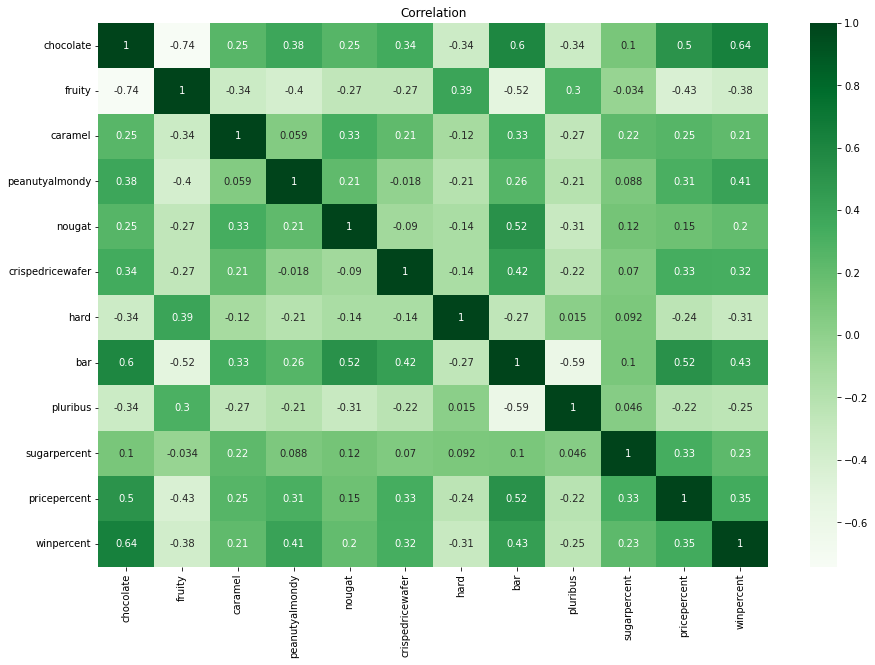

In [110]:
fig_corr = plt.figure(figsize= (15,10))
sns.heatmap(df.corr(), cmap= "Greens", annot= True).set_title("Correlation")

We recognize the correlation already established above between chocolate, caramel, peanutyalmondy and winpercent. Now we check their p-value to prove the significance of our observed correlation:

In [111]:
print(linregress(df.chocolate, df.winpercent))
print(linregress(df.caramel, df.winpercent))
print(linregress(df.peanutyalmondy, df.winpercent))
print(linregress(df.bar, df.winpercent))

LinregressResult(slope=18.77927240540544, intercept=42.142256999999994, rvalue=0.6365167485397073, pvalue=5.859698106039011e-11, stderr=2.4976541943911545, intercept_stderr=1.6478728876096413)
LinregressResult(slope=8.416369460764596, intercept=48.930538253521135, rvalue=0.2134162955676798, pvalue=0.049864431705954324, stderr=4.2289792318294985, intercept_stderr=1.7162877682933382)
LinregressResult(slope=16.018756377263593, intercept=47.678380408450714, rvalue=0.40619220218098295, pvalue=0.0001147207635657216, stderr=3.955518856976342, intercept_stderr=1.6053066849763733)
LinregressResult(slope=14.58101794717261, intercept=46.71439467187501, rvalue=0.42992932818934837, pvalue=4.0186353452792626e-05, stderr=3.361037533844676, intercept_stderr=1.6706041153961144)


**BEST COMBINATIONS**

Above we have established dependecies and correlations of characteristics. We have only ever looked at these in isolation. However, these are usually present together.  Therefore, we now want to look for the best combination of these to maximize our winpercentage.

In [112]:
table1 = df.pivot_table(
 values= ["winpercent"],
 columns= ["chocolate", "peanutyalmondy", "caramel"],
 aggfunc= dict(winpercent= "mean")
)

table2 = df.pivot_table(
 values= ["winpercent"],
 columns= ["chocolate", "peanutyalmondy"],
 aggfunc= dict(winpercent= "mean"),
 fill_value= 0
)

table3 = df.pivot_table(
 values= ["winpercent"],
 columns= ["chocolate", "caramel"],
 aggfunc= dict(winpercent= "mean"),
 fill_value= 0
)

table4 = df.pivot_table(
 values= ["winpercent"],
 columns= ["peanutyalmondy", "caramel"],
 aggfunc= dict(winpercent= "mean"),
 fill_value= 0
)

In [113]:
table1

chocolate               0                                1             \
peanutyalmondy          0                     1          0              
caramel                 0          1          0          0          1   
winpercent      43.119604  35.522633  34.857211  53.577917  66.806942   

chocolate                             
peanutyalmondy          1             
caramel                 0          1  
winpercent      69.880879  64.372527

In [114]:
table2

chocolate               0                     1           
peanutyalmondy          0          1          0          1
winpercent      42.458998  34.857211  57.282044  68.503791

In [115]:
table3

chocolate           0                     1           
caramel             0          1          0          1
winpercent  42.744041  35.522633  59.012238  66.076617

In [116]:
table4

peanutyalmondy          0                   1           
caramel                 0         1         0          1
winpercent      46.257098  55.43083  63.51294  64.372527

In [117]:
pd.concat([table2, table3, table4], sort= True, axis=1)

chocolate               0                     1                     0  \
peanutyalmondy          0          1          0          1          0   
winpercent      42.458998  34.857211  57.282044  68.503791  42.744041   

chocolate                          1                     0            \
peanutyalmondy          1          0          1          0         1   
winpercent      35.522633  59.012238  66.076617  46.257098  55.43083   

chocolate              1             
peanutyalmondy         0          1  
winpercent      63.51294  64.372527

We recognize that products with chocolate and peanutyalmondy but without caramel have the best winpercentage and therefore the best combination of characteristics.

#### **MACHINE LEARNING** 

In our analysis earlier, we took a closer look at the data and found correlations. Based on this, we now want to create smaller machine learning algorithms that will allow us to predict the classification and regression of some attributes.

**FEATURE IMPORTANCE**

Let's first take a look at the weighting of our features. We use Principal Component Analysis to determine the variance that each feature explains.

In [118]:
X = df.drop(["competitorname"], axis= 1)

In [119]:
pc = PCA()
pc.fit(X)

PCA()

In [120]:
df_pca = pd.DataFrame(pc.explained_variance_ratio_)

In [121]:
X

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


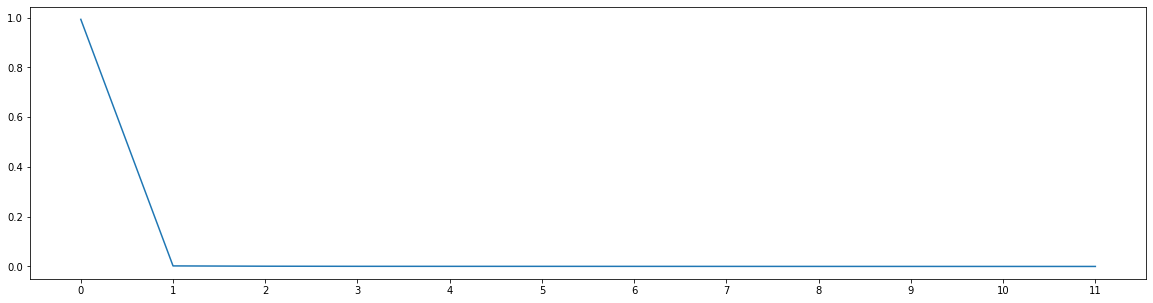

In [122]:
plt.figure(figsize= (20, 5))
plt.plot(df_pca)
plt.xticks(df_pca.index)
plt.show()

In [123]:
X.columns

Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',
       'crispedricewafer', 'hard', 'bar', 'pluribus', 'sugarpercent',
       'pricepercent', 'winpercent'],
      dtype='object')

In [124]:
pc.explained_variance_

array([2.16768672e+02, 4.93376209e-01, 2.28118989e-01, 1.39067582e-01,
       1.20000939e-01, 1.12987619e-01, 9.45445030e-02, 7.51682793e-02,
       5.67693343e-02, 4.59438204e-02, 3.39804902e-02, 2.35025405e-02])

As we can see the feature chocolate is most important later for our prediction.

**CLASSIFICATION**

In our analysis above we have established that chocolate is one of the most important attributes for the prediction of the winpercentage. But now we want to turn tables and try to classify whether a product contains chocolate.

- lets split our data in train and test sets first

In [125]:
df_clf = df.copy()

In [126]:
X = df_clf.drop(["chocolate", "competitorname"], axis= 1)
y = df_clf["chocolate"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state=0)

Since we want to try out several alogrithms, we first create a basic model and then try to improve it. At the same time we want to find the best parameters to achieve the highest accuracy. We do this with a 10-fold cross validation using GridSearchCV.

- as a basic model we take a normal decision tree

DecisionTree (Basemodell):

In [128]:
dtc_cv = GridSearchCV(
 estimator= DecisionTreeClassifier(),
 param_grid= dict(min_samples_split= [2, 10, 20, 50], max_depth= [1, 3, 6, 9], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 cv= 10
).fit(X_train, y_train)

print(f"Best param: {dtc_cv.best_params_} with best acc-score: {dtc_cv.best_score_}")

Best param: {'max_depth': 3, 'min_samples_split': 10, 'random_state': 0} with best acc-score: 0.9266666666666667


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        18
           1       1.00      0.67      0.80        12

    accuracy                           0.87        30
   macro avg       0.91      0.83      0.85        30
weighted avg       0.89      0.87      0.86        30



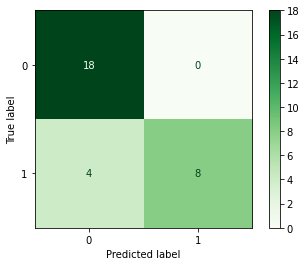

In [129]:
best_dtc = DecisionTreeClassifier(max_depth= 3, min_samples_split= 10, random_state= 0).fit(X_train, y_train)

y_pred_train_best_dtc = best_dtc.predict(X_train)
y_pred_test_best_dtc = best_dtc.predict(X_test)

print(classification_report(y_test, y_pred_test_best_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_dtc, cmap= "Greens"))

We achieve 87% accuracy on our test data. Now we try to improve this value a little bit. For this we use methodes from the ensemble of sklearn.

Gradient Boosting:

In [130]:
gbc_cv = GridSearchCV(
 estimator= GradientBoostingClassifier(),
 param_grid= dict(learning_rate= [0.001, 0.01, 0.1], max_depth= [1,3,5,9], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 ).fit(X_train, y_train)
 
print(f"Best parameters: {gbc_cv.best_params_}, with best acc-score: {gbc_cv.best_score_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 1, 'random_state': 0}, with best acc-score: 0.9272727272727274


              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.83      0.83      0.83        12

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



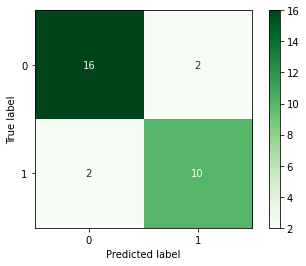

In [131]:
best_gbc = GradientBoostingClassifier(max_depth= 1, random_state= 0, learning_rate= 0.1).fit(X_train, y_train)

y_pred_train_best_gbc = best_gbc.predict(X_train)
y_pred_test_best_gbc = best_gbc.predict(X_test)

print(classification_report(y_test, y_pred_test_best_gbc))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_gbc, cmap= "Greens"))

Random Forest:

In [132]:
rfc_cv = GridSearchCV(
 estimator= RandomForestClassifier(),
 param_grid= dict(n_estimators= [100, 150, 300], criterion= ["gini", "entropy"], max_features= [3, 5, 11], random_state= [0]),
 scoring= "accuracy",
 n_jobs= -1,
 ).fit(X_train, y_train)
 
print(f"Best parameters: {rfc_cv.best_params_}, with best acc-score: {rfc_cv.best_score_}")

Best parameters: {'criterion': 'gini', 'max_features': 3, 'n_estimators': 150, 'random_state': 0}, with best acc-score: 0.9636363636363636


              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       1.00      0.75      0.86        12

    accuracy                           0.90        30
   macro avg       0.93      0.88      0.89        30
weighted avg       0.91      0.90      0.90        30



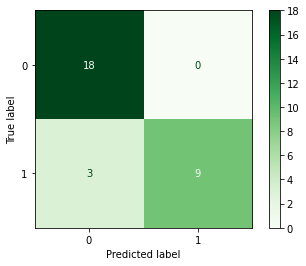

In [133]:
best_rfc = RandomForestClassifier(random_state= 0, criterion= "gini", max_features= 3, n_estimators= 150).fit(X_train, y_train)

y_pred_train_best_rfc = best_rfc.predict(X_train)
y_pred_test_best_rfc = best_rfc.predict(X_test)

print(classification_report(y_test, y_pred_test_best_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_best_rfc, cmap= "Greens"))

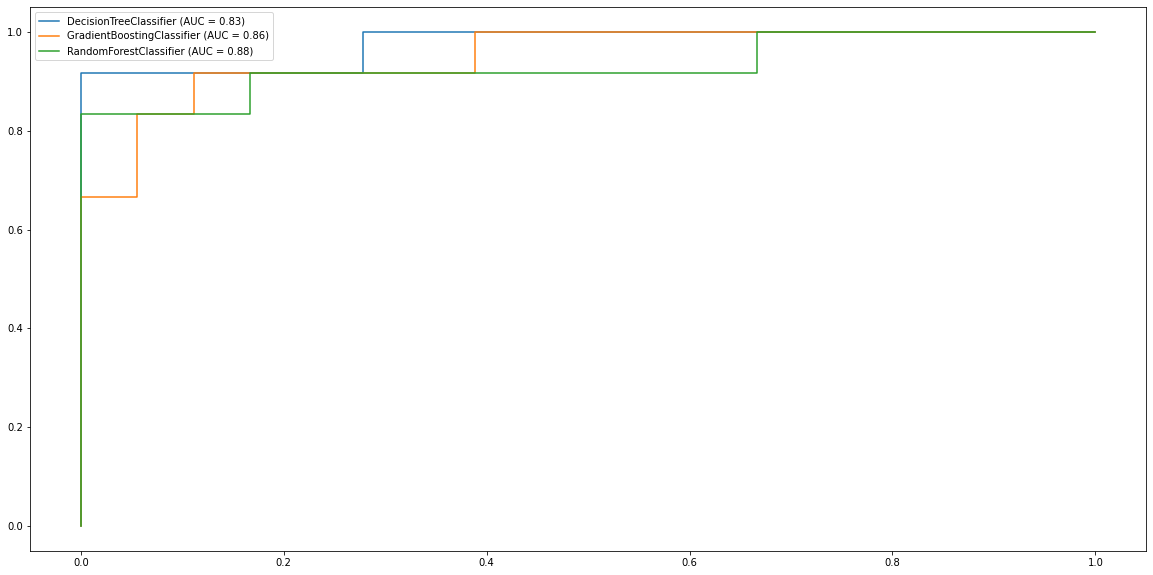

In [134]:
y_predict= [
 [best_dtc, y_pred_test_best_dtc, "DecisionTreeClassifier"],
 [best_gbc, y_pred_test_best_gbc, "GradientBoostingClassifier"],
 [best_rfc, y_pred_test_best_rfc, "RandomForestClassifier"]
]


plt.figure(figsize= (20,10))
    
for model in y_predict:
 fpr, tpr, thr = roc_curve(y_test, model[0].predict_proba(X_test)[:,1])
 auc = roc_auc_score(y_test, model[1])
 plt.step(x=fpr, y=tpr, label=f"{model[2]} (AUC = {auc.round(2)})")

 plt.legend()

As we can see, our baseline model performs the best.

In [135]:
df_clf_scatter = df_clf.copy()

In [136]:
df_clf_scatter["pred_y"] = best_rfc.predict(X)

In [137]:
df_clf_scatter["pred_false"] = 1  

df_clf_scatter.loc[df_clf_scatter.chocolate != df_clf_scatter.pred_y, "pred_false"] = 0

In [138]:
fig_pred = make_subplots(cols= 2, rows= 1)

fig_pred.add_trace(
 go.Scatter(
  x= df_clf_scatter.competitorname,
  y= df_clf_scatter.winpercent,
  mode= "markers",
  marker= dict(color= df_clf_scatter.pred_y, colorscale= [(0, px.colors.sequential.amp[8]), (1, px.colors.sequential.speed[8])]),
  name= "Predicited Label"
 ),
 col= 1,
 row= 1
)

fig_pred.add_trace(
 go.Scatter(
  x= df_clf_scatter.competitorname,
  y= df_clf_scatter.winpercent,
  mode= "markers",
  marker= dict(color= df_clf_scatter.pred_false, colorscale= [(0, px.colors.sequential.amp[8]), (1, "grey")]),
  name = "True Label"
 ),
 col= 2,
 row= 1
)

fig_pred.update_layout(
     title= dict(text= "<b>CHOCOLATE PREDICTION<b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>chocolate</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

fig_pred.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), col=1, row=1, showgrid= False)
fig_pred.update_xaxes(showgrid= False)
fig_pred.update_yaxes(showgrid= False, col=2, row= 1)
fig_pred.update_xaxes(showgrid= False, col=1, row= 1)
fig_pred.show()

**REGRESSION**

Let us now try to predict the winpercentage with our data by regression. Therefore we again make a Basemodel.

- we also hope to be able to use the feature_importance of our models later to confirm our findings from the analysis above

LinearRegression (Basemodel)

In [139]:
df_r = df.copy()

In [140]:
X = df_r.drop(["winpercent", "competitorname"], axis= 1)
y= df_r["winpercent"]

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state=0)

In [142]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [143]:
lr_model = LinearRegression(n_jobs= -1).fit(X_train, y_train)

In [144]:
lr_model.score(X_train, y_train)

0.544173686718049

In [145]:
y_pred_train_lr_model = lr_model.predict(X_train)
y_pred_test_lr_model = lr_model.predict(X_test)

print(f"Train r2: {r2_score(y_train, y_pred_train_lr_model)}\n Test r2: {r2_score(y_test, y_pred_test_lr_model)}")
print(f"Train mse: {mean_squared_error(y_train, y_pred_train_lr_model)}\n Test mse: {mean_squared_error(y_test, y_pred_test_lr_model)}")

Train r2: 0.544173686718049
 Test r2: 0.3328906658802806
Train mse: 99.80621879989836
 Test mse: 133.3192512030649


Gradient Boosting Regressor

In [146]:
gbr = GradientBoostingRegressor(random_state= 0).fit(X_train, y_train)

In [147]:
gbr.score(X_train, y_train)

0.9391706485789999

In [148]:
y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

print(f"Train r2: {r2_score(y_train, y_pred_train_gbr)}\n Test r2: {r2_score(y_test, y_pred_test_gbr)}")
print(f"Train mse: {mean_squared_error(y_train, y_pred_train_gbr)}\n Test mse: {mean_squared_error(y_test, y_pred_test_gbr)}")

Train r2: 0.9391706485789999
 Test r2: 0.014225975477869524
Train mse: 13.318993178932487
 Test mse: 197.00317186858172


In [149]:
feature_importances_gbr = pd.DataFrame.from_dict(dict(zip(X.columns, gbr.feature_importances_)), orient= "index", columns= ["feature_importance"])

df_feature_imp_gbr = feature_importances_gbr.reset_index().rename(columns= {"index": "feature"})

In [150]:
df_feature_imp_gbr

,feature,feature_importance
0,chocolate,0.453898
1,fruity,0.026437
2,caramel,0.034531
3,peanutyalmondy,0.027182
4,nougat,0.003562
5,crispedricewafer,0.050711
6,hard,0.005938
7,bar,0.002513
8,pluribus,0.009295
9,sugarpercent,0.115806


Random Forest Regressor

In [151]:
rfr = RandomForestRegressor().fit(X_train, y_train)

In [152]:
rfr.score(X_train, y_train)

0.8658458073144762

In [153]:
y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)

print(f"Train r2: {r2_score(y_train, y_pred_train_rfr)}\n Test r2: {r2_score(y_test, y_pred_test_rfr)}")
print(f"Train mse: {mean_squared_error(y_train, y_pred_train_rfr)}\n Test mse: {mean_squared_error(y_test, y_pred_test_rfr)}")

Train r2: 0.8658458073144762
 Test r2: 0.44321912286793974
Train mse: 29.373957399894753
 Test mse: 111.27053067152966


In [154]:
feature_importances_rfr = pd.DataFrame.from_dict(dict(zip(X.columns, rfr.feature_importances_)), orient= "index", columns= ["feature_importance"])

df_feature_imp_rfr = feature_importances_rfr.reset_index().rename(columns= {"index": "feature"})

In [155]:
df_feature_imp_rfr

,feature,feature_importance
0,chocolate,0.441450
1,fruity,0.025326
2,caramel,0.040398
3,peanutyalmondy,0.024159
4,nougat,0.007886
5,crispedricewafer,0.026664
6,hard,0.012895
7,bar,0.011901
8,pluribus,0.022654
9,sugarpercent,0.181396


Plotting our predicted label in comparison to our true label of winpercent:

In [156]:
df_r_pred = df_r.copy()

In [157]:
df_r_pred["y_pred"] = rfr.predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [158]:
fig_pred = go.Figure()

fig_pred.add_trace(
 go.Scatter(
  x= df_r_pred.competitorname,
  y= df_r_pred.winpercent,
  mode= 'lines+markers',
  marker= dict(color= "grey"),
  name= "True Label"
 )
)

fig_pred.add_trace(
 go.Scatter(
  x= df_r_pred.competitorname,
  y= df_r_pred.y_pred,
  mode= 'lines+markers',
  name = "Predicited Label",
  marker= dict(color= px.colors.sequential.amp[8])
 )
)

fig_pred.update_layout(
     title= dict(text= "<b>WINPERCENT PREDICTION<b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>WINPERCENT</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

fig_pred.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), showgrid= False)
fig_pred.update_xaxes(title_font= dict(size= 14), showgrid= False)
fig_pred.show()

As you can see, we don't really get usable values from our models. Even with GradientBoostingRegressor and RandomForestRegressor we only get acceptable values, and both tend to overfit. However, the feature_importance of our models confirms the findings in the analysis from above. 

- We can see that the attribute chocolate is of extreme importance for the prediction. even if our models are only acceptable, they would be even worse without the attribute.

In [159]:
df_rc = df.copy()

In [160]:
X = df_rc.drop(["winpercent", "competitorname", "chocolate"], axis= 1)
y = df_rc["winpercent"]

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.35, random_state=0)

In [162]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [163]:
rfr_c = RandomForestRegressor().fit(X_train, y_train)

In [164]:
rfr_c.score(X_train, y_train)

0.8485684175642961

In [165]:
y_pred_train_rfr_c = rfr_c.predict(X_train)
y_pred_test_rfr_c = rfr_c.predict(X_test)

print(f"Train r2: {r2_score(y_train, y_pred_train_rfr_c)}\n Test r2: {r2_score(y_test, y_pred_test_rfr_c)}")
print(f"Train mse: {mean_squared_error(y_train, y_pred_train_rfr_c)}\n Test mse: {mean_squared_error(y_test, y_pred_test_rfr_c)}")

Train r2: 0.8485684175642961
 Test r2: 0.11987797973077408
Train mse: 33.15695739671804
 Test mse: 175.88902254598733


In [166]:
feature_importances_rfr_c = pd.DataFrame.from_dict(dict(zip(X.columns, rfr_c.feature_importances_)), orient= "index", columns= ["feature_importance"])

df_feature_imp_rfr_c = feature_importances_rfr_c.reset_index().rename(columns= {"index": "feature"})

In [167]:
df_feature_imp_rfr_c

,feature,feature_importance
0,fruity,0.091059
1,caramel,0.052083
2,peanutyalmondy,0.120227
3,nougat,0.009395
4,crispedricewafer,0.043040
5,hard,0.015117
6,bar,0.134456
7,pluribus,0.017508
8,sugarpercent,0.229510
9,pricepercent,0.287607


Plotting our predicted label in comparison to our true label of winpercent:

In [168]:
df_rc_pred = df_rc.copy()

In [169]:
df_rc_pred["y_pred"] = rfr_c.predict(X)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



In [170]:
fig_pred = go.Figure()

fig_pred.add_trace(
 go.Scatter(
  x= df_rc_pred.competitorname,
  y= df_rc_pred.winpercent,
  mode= 'lines+markers',
  marker= dict(color= "grey"),
  name= "True Label"
 )
)

fig_pred.add_trace(
 go.Scatter(
  x= df_rc_pred.competitorname,
  y= df_rc_pred.y_pred,
  mode= 'lines+markers',
  name = "Predicited Label",
  marker= dict(color= px.colors.sequential.amp[8])
 )
)

fig_pred.update_layout(
     title= dict(text= "<b>WINPERCENT PREDICTION WITHOUT CHOCOLATE<b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>WINPERCENT</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

fig_pred.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), showgrid= False)
fig_pred.update_xaxes(title_font= dict(size= 14), showgrid= False)
fig_pred.show()

Plotting the difference of predicted and true label of our two regression models (with & without chocolate) in comparison: 

In [171]:
df_rc_pred["diff_c"] = np.abs(df_rc_pred["winpercent"] - df_rc_pred["y_pred"])

df_rc_pred["diff"] = np.abs(df_rc_pred["winpercent"] - df_r_pred["y_pred"])

In [172]:
fig_pred_diff = go.Figure()

fig_pred_diff.add_trace(
 go.Scatter(
  x= df_rc_pred.competitorname,
  y= df_rc_pred.diff_c,
  mode= 'lines+markers',
  marker= dict(color= "grey"),
  name= "without label chocolate"
 )
)

fig_pred_diff.add_trace(
 go.Scatter(
  x= df_rc_pred.competitorname,
  y= df_rc_pred["diff"],
  mode= 'lines+markers',
  marker= dict(color= px.colors.sequential.amp[8]),
  name= "With label chocolate"
 )
)

fig_pred_diff.update_layout(
     title= dict(text= "<b>DIFFERENZ OF WINPERCENT PREDICTION AND TRUE VALUE WITH & WITHOUT CHOCOLATE<b>", font_size= 20, xanchor= "center", yanchor= "top", y=0.955, x=0.475),
     height= 600,
     legend_title_text= "<b>MODELS</b>",
     legend_title_font_size= 16,
     paper_bgcolor='rgba(0,0,0,0)',
     plot_bgcolor='rgba(0,0,0,0)',
     font= dict(color= "white")
)

fig_pred_diff.update_yaxes(title_text="<b>winpercent %</b>", title_font= dict(size= 14), showgrid= False)
fig_pred_diff.update_xaxes(title_font= dict(size= 14), showgrid= False)
fig_pred_diff.show()

### **CONCLUSION**

In summary, in our analysis we have found good and bad characteristics for a candy. 

- chocolate, peantuyalmondy and caramel are the most important characteristics to achieve high winpercentage (espacially the combination of chocolate and peanutyalmondy) 
- fruity, hard, pluribus are often triggers for a worse winpercentage

Finally, it would be advisable to produce a candy in private label that contains the good characteristics just mentioned. A perfect example which represents this best would be Reese's Peanut Butter cup.
